# Massplanes Comparisons

**Goal:** Compare the massplanes and cutflows between the pairing algos

In [27]:
import pandas as pd
import numpy as np
import itertools
from itertools import combinations
from tqdm import tqdm
from glob import glob
import dask.dataframe as dd

import matplotlib.pyplot as plt
from matplotlib import gridspec

import json
import time
import h5py
import uproot

from processMC import L

import os
os.sys.path.append('../eda_tools')
from plot_helper import massplane

os.sys.path.append('../code')
from plotting import SR_x,SR_y1,SR_y2, CR_x, CR_y1, CR_y2, SB_x, SB_y1, SB_y2

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Cutflows

In [68]:
physicsSample = 'data16'
prodTag = 'FEB20'


dataDir = f'../data/{physicsSample}_PFlow-{prodTag}'

In [52]:
k1 = 'df_MDpT'

cf_MDR = pd.read_hdf(f'{dataDir}/cutflow_MDR_blinded.h5')
cf_min_dR = pd.read_hdf(f'{dataDir}/cutflow_min_dR1_blinded.h5',k1)

# cf_sm = pd.read_hdf(f'{dataDir}-5jets/cutflow_SM_2b_blinded.h5')
# = pd.read_hdf(f'{dataDir}-5jets/cutflow_k10_blinded.h5')


FileNotFoundError: File ../data/data17_PFlow-FEB20/cutflow_MDR_blinded.h5 does not exist

In [13]:
k2 = 'df_noMDpT'

cf_MDR_noMDpT = pd.read_hdf(f'{dataDir}/cutflow_MDR_blinded.h5')
cf_min_dR_noMDpT = pd.read_hdf(f'{dataDir}/cutflow_min_dR1_blinded.h5',k2)



In [ ]:
# def recreateCutflowRR(dfs1,dfs2,labels=[],ntag=4):
#     '''
#     Recreate the parts of the cutflow tables that I can w/ the $m_{hh}$ reweighting
#     '''

#     idx = ['everything',f'{ntag}b','$|\Delta \eta_{hh}|<1.5$','$X_{wt}>1.5$','CR','VR','SR']
#     cols = ['$\kappa_\lambda$ = 1', '$\kappa_\lambda$ = 10', 'rw $\kappa_\lambda$ = 10']
#     cols += ['err '+c for c in cols]
    
#     df = pd.DataFrame(0,idx,cols)
    
    

In [31]:
L.keys()

dict_keys([15, 16, 17, 18, 2015, 2016, 2017, 2018])

In [32]:
yr = physicsSample[-2:]

lumiText = r'$\mathcal{L}$ = '+f'{L[int(yr)]}' + ' fb$^{-1}$'

text = "$\mathbf{ATLAS}$ "+f"20{yr} data Internal\n"
text += f'20{yr} triggers, {lumiText}\n'
text += f" {prodTag} MNT, DL1r 77% WP"

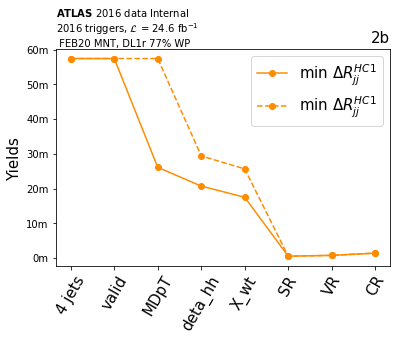

In [48]:
kwargs = {'lw':0.5, 'marker':'o'}

ntag = 2

x1 = np.arange(len(cf_min_dR.index))

plt.figure()
for df1, df2, l, c in zip([cf_min_dR],
                          [cf_min_dR_noMDpT],
                          ['min $\Delta R_{jj}^{HC1}$'],
                          ['darkorange']):


    plt.plot(x1, df1[f'{ntag}b'], color=c,label=l, marker='o',ls='-')

    # For MDpT, plot 2 parts
    y =np.ones_like(x1)
    y[:2] = df2[f'{ntag}b'].values[:2]
    y[2] =  df2[f'{ntag}b'].values[1]
    y[3:] = df2[f'{ntag}b'].values[2:]
    plt.plot(x1, y, color=c,label=l, marker='o',ls='--')
    
    
plt.ylabel('Yields',fontsize=15)
ax = plt.gca()
ax.set_xticks(x1)
xlabels = ['4 jets','valid']+list(df1.index[2:])
ax.set_xticklabels(xlabels,rotation=60,fontsize=15)

yticks = ax.get_yticks()
ax.set_yticklabels([f'{int(yi/1e6)}m' for yi in yticks])

plt.legend(loc='upper right',fontsize=15)
plt.title(f'{ntag}b',loc='right',fontsize=15)
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes);

#plt.savefig(f'{figDir}/miniCutflow_{ntag}b.pdf',bbox_inches='tight')

## Massplanes

In [70]:
dataDir

'../data/data16_PFlow-FEB20'

In [160]:
f_MDR    = h5py.File(f'{dataDir}/massplanes_MDR_blinded.h5')
f_min_dR = h5py.File(f'{dataDir}/massplanes_min_dR1_blinded.h5')

In [72]:
for k in f_min_dR.keys():
    print(k)

mp_MDpT_deta_2b
mp_MDpT_deta_3b
mp_MDpT_deta_4b
mp_MDpT_deta_Xwt_2b
mp_MDpT_deta_Xwt_3b
mp_MDpT_deta_Xwt_4b
mp_deta_2b
mp_deta_3b
mp_deta_4b
mp_deta_Xwt_2b
mp_deta_Xwt_3b
mp_deta_Xwt_4b


Ok... let's make the Lucas plots!!

In [152]:
kwargs = {'figsize': (10, 8),
           'bins' : (25,25),
           'xrange': (50, 200),
           'yrange': (50, 200),
           'xhisttype': 'step',
           'yhisttype': 'step',
           'cmap': 'YlGnBu',
           'title': '2b',
           'text': text,
           'xlabel': '$m_{HC1}$ [GeV]',
           'ylabel': '$m_{HC2}$ [GeV]',
           'axis_hist_on': True,
           'hist_color': 'black',
           'alpha': 0.7,
           'save': True,
           'show': True,
          }

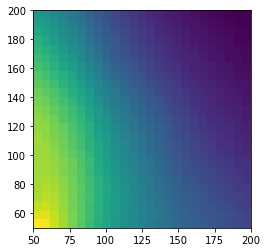

In [128]:
plt.imshow(f_min_dR['mp_MDpT_deta_2b'][:].T[::-1],
           extent=[*kwargs['xrange'],*kwargs['yrange']])

In [95]:
f_min_dR['mp_MDpT_deta_2b'][:].shape()

(25, 25)

In [145]:
_,ex,ey = np.histogram2d(*np.zeros((2,100)),kwargs['bins'],[kwargs['xrange'],kwargs['yrange']])

xx = 0.5 * (ex[:-1] + ex[1:])
yy = 0.5 * (ey[:-1] + ey[1:])

out = np.vstack([o.flatten() for o in np.meshgrid(xx,yy)]).T
dfi = pd.DataFrame(out,columns=['m_h1','m_h2'])

In [153]:
subDir='data16_PFlow-FEB20'

In [158]:
# text = "$\mathbf{ATLAS}$ "+f"20{yr} data Internal\n"
# text += f"{prodTag} MNT, DL1r 77% WP\n"
# text += "MDR+$\min(D_{hh}$), MDpT, $|\Delta \eta_{hh}|$ < 1.5"

SR center: (120.0,110.0) GeV


SR center: (120.0,110.0) GeV


SR center: (120.0,110.0) GeV


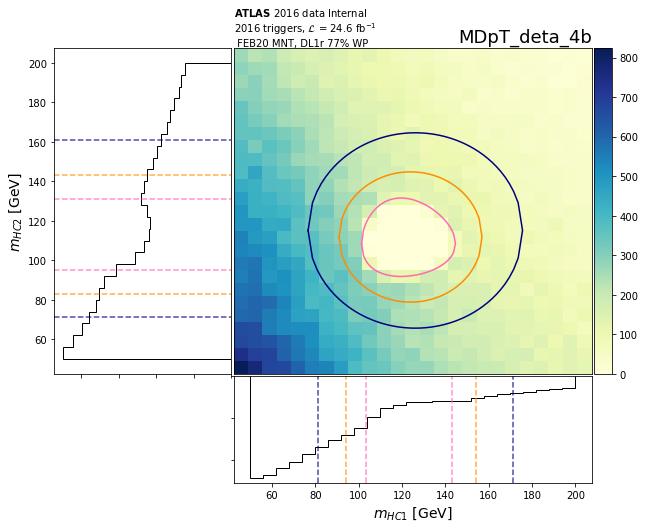

SR center: (120.0,110.0) GeV


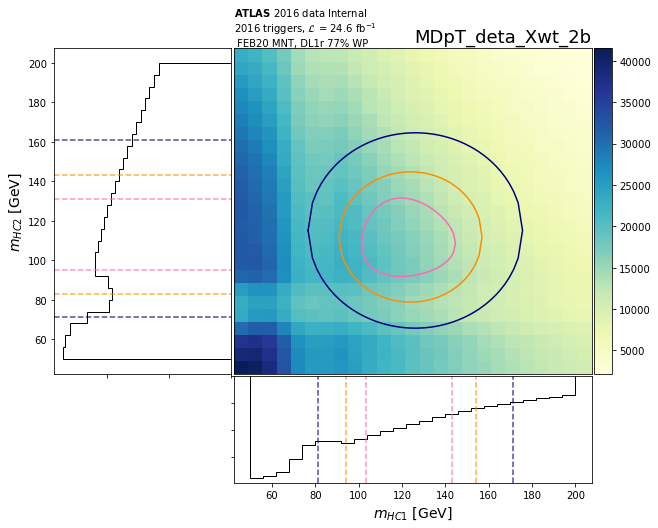

SR center: (120.0,110.0) GeV


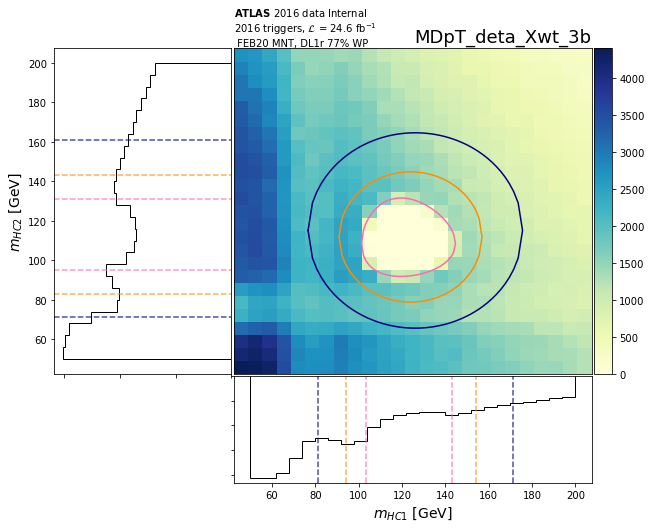

SR center: (120.0,110.0) GeV


SR center: (120.0,110.0) GeV


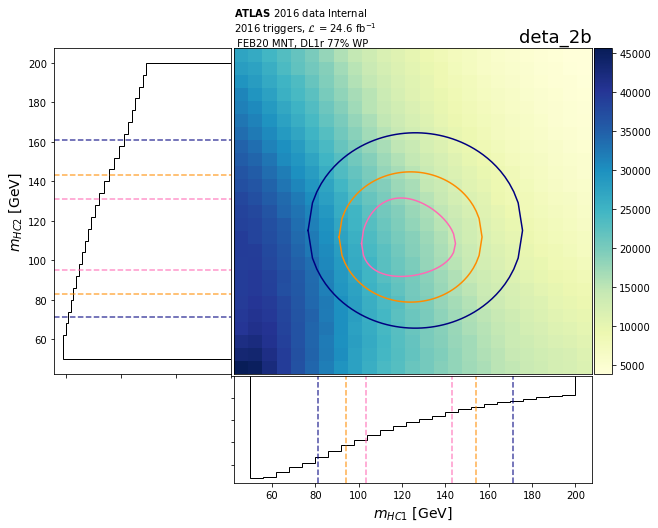

SR center: (120.0,110.0) GeV


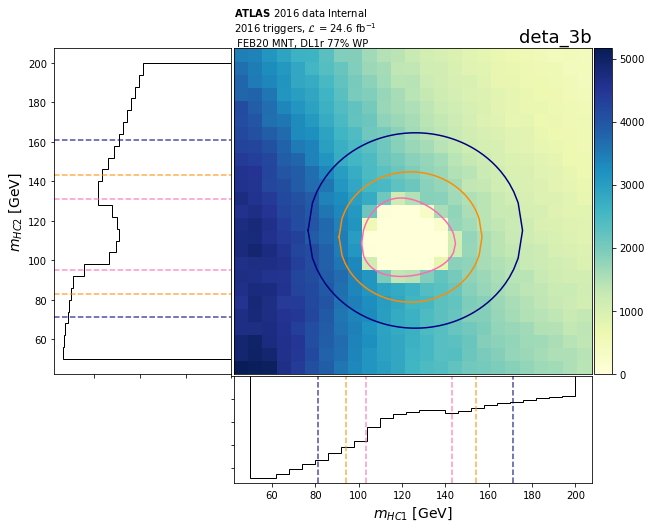

SR center: (120.0,110.0) GeV


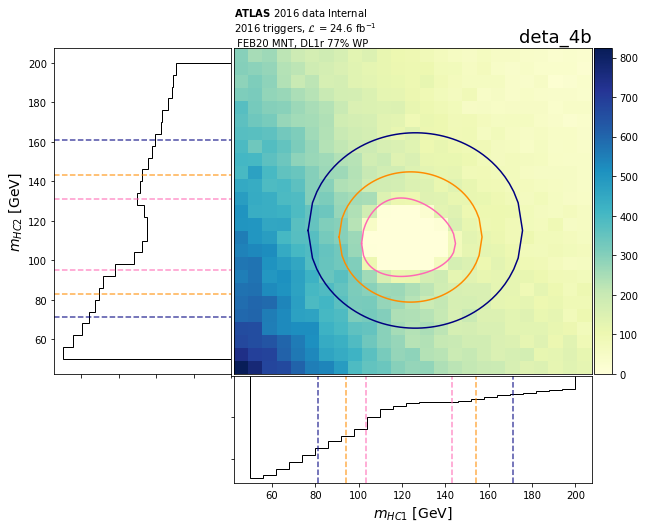

SR center: (120.0,110.0) GeV


SR center: (120.0,110.0) GeV


SR center: (120.0,110.0) GeV


In [156]:
for k in f_min_dR.keys():
      
    kwargs['filename'] = f'figures/{subDir}/min_dR1/massplane_{k[3:]}.pdf'
    kwargs['weights'] = f_min_dR[k][:].T.flatten()
    kwargs['title'] = k[3:]
    
    massplane(dfi,**kwargs)
    

**And now with MDR**

SR center: (120.0,110.0) GeV


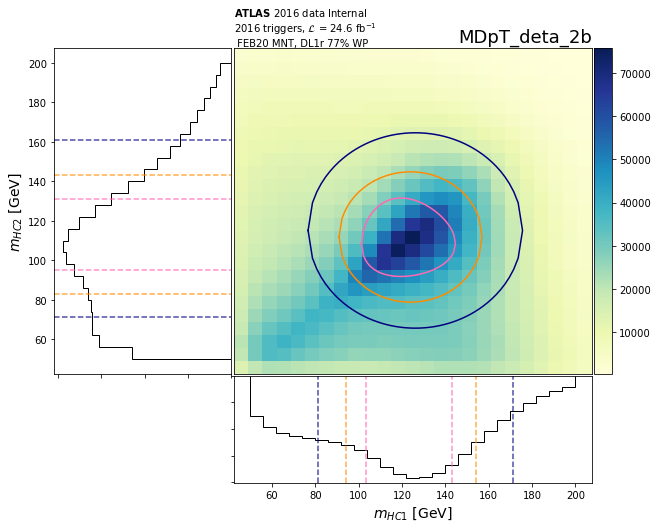

SR center: (120.0,110.0) GeV


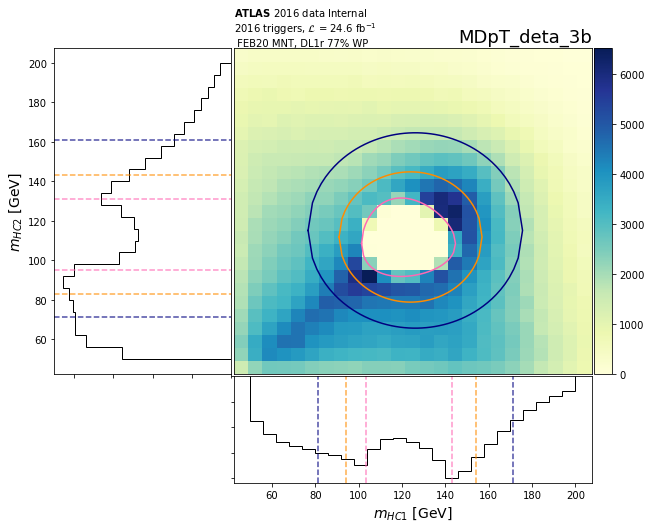

SR center: (120.0,110.0) GeV


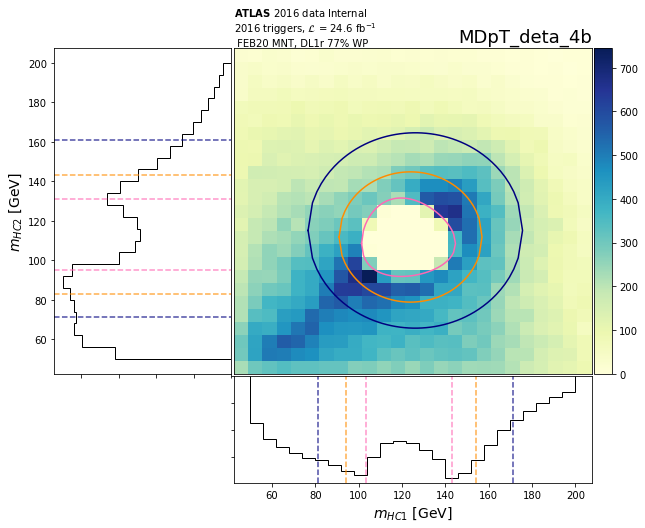

SR center: (120.0,110.0) GeV


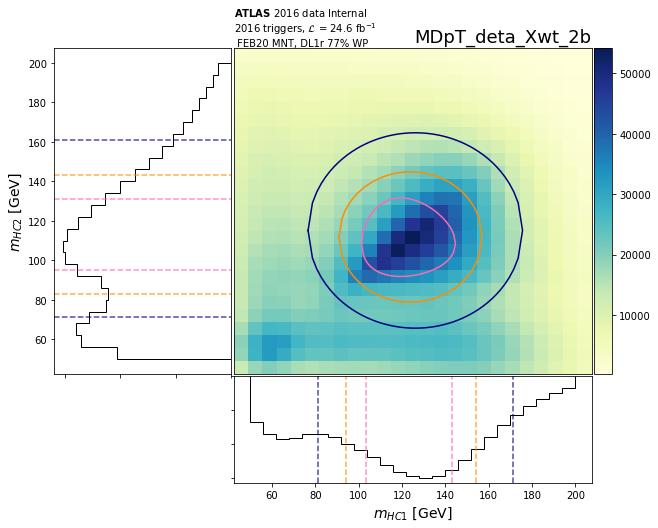

SR center: (120.0,110.0) GeV


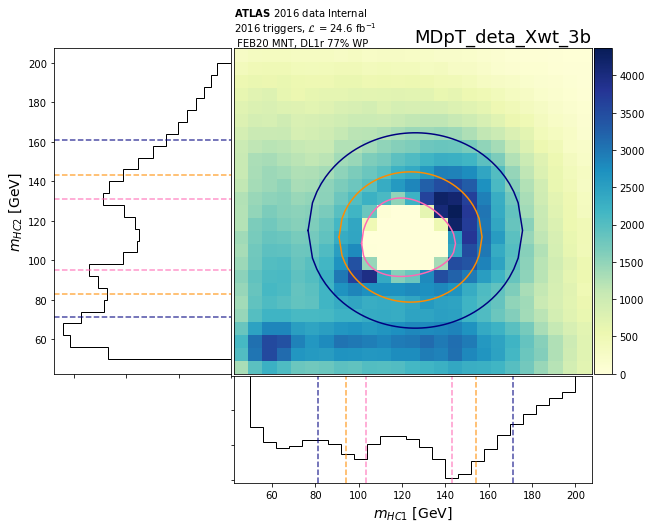

SR center: (120.0,110.0) GeV


SR center: (120.0,110.0) GeV


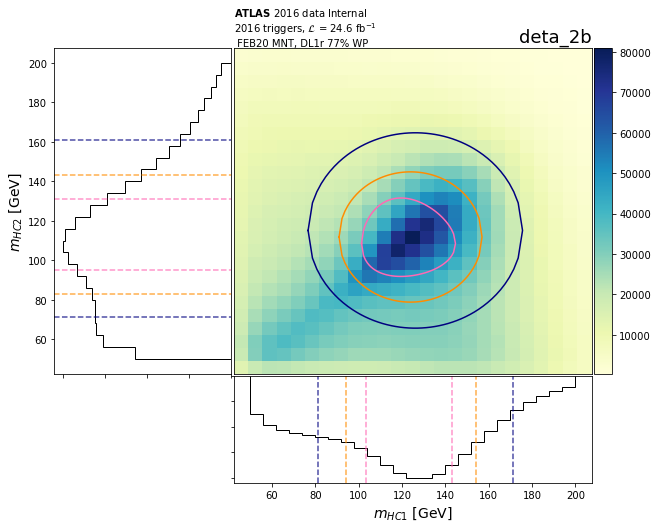

SR center: (120.0,110.0) GeV


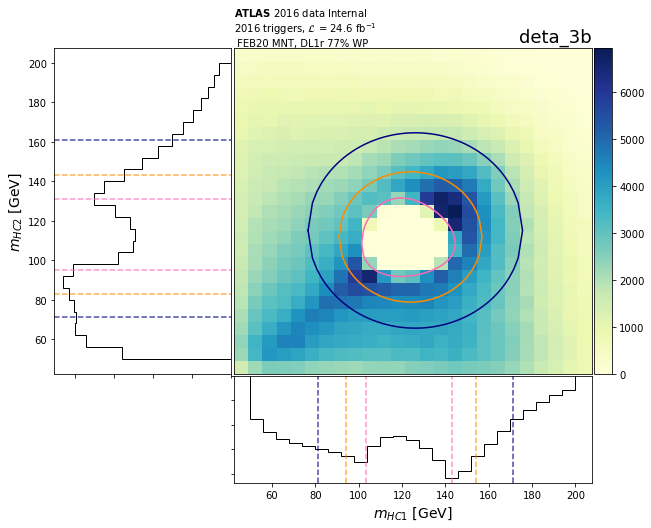

SR center: (120.0,110.0) GeV


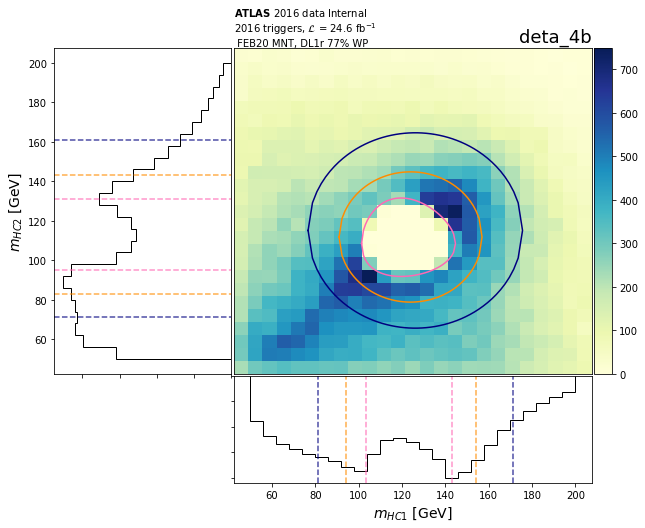

SR center: (120.0,110.0) GeV


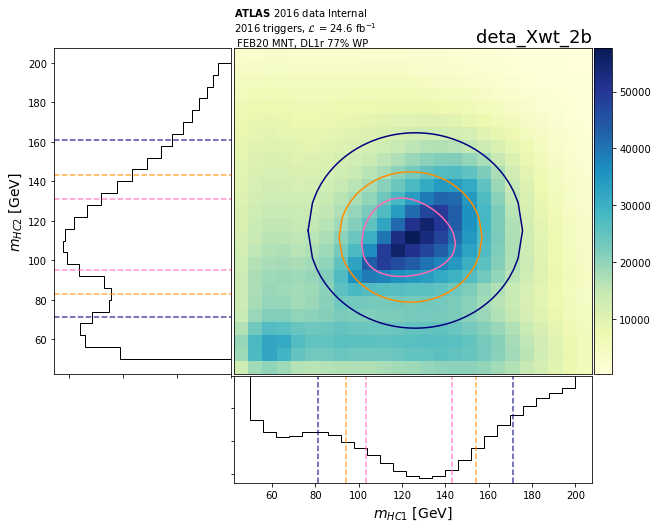

SR center: (120.0,110.0) GeV


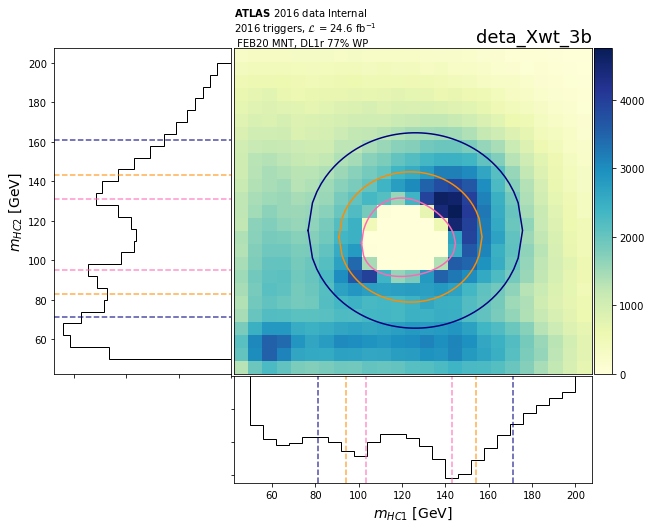

SR center: (120.0,110.0) GeV


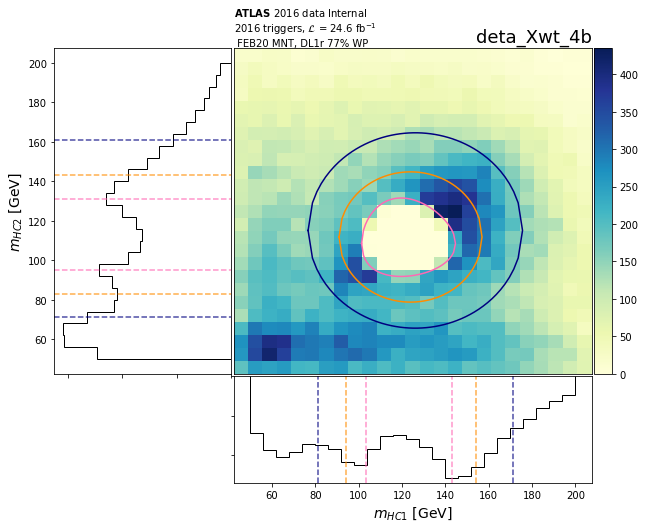

In [163]:
for k in f_MDR.keys():
      
    kwargs['filename'] = f'figures/{subDir}/MDR/massplane_{k[3:]}.pdf'
    kwargs['weights'] = f_MDR[k][:].T.flatten()
    kwargs['title'] = k[3:]
    
    massplane(dfi,**kwargs)
    